In [296]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# Load CSV
amz_dataset = pd.read_csv("amz_uk_price_prediction_dataset.csv")
amz_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


# Part 1: Understandign Product Categories

In [288]:
# 1. Generate a frequency table for the product category sort by count
frequency_table = amz_dataset.category.value_counts()
proportion_table = amz_dataset.category.value_counts(normalize=True).round(2)

# merging absoluty frequency with relative frequenceies
category_freq_df = pd.concat([frequency_table, proportion_table], axis=1).reset_index()
category_freq_df.columns = ['category','absolute_frequency', 'relative_frequency']

# 1.1 Top 5 most listed product categories
print(category_freq_df.head())

                                 category  absolute_frequency  \
0                       Sports & Outdoors              836265   
1                                  Beauty               19312   
2  Handmade Clothing, Shoes & Accessories               19229   
3                             Bath & Body               19092   
4                          Birthday Gifts               18978   

   relative_frequency  
0                0.34  
1                0.01  
2                0.01  
3                0.01  
4                0.01  


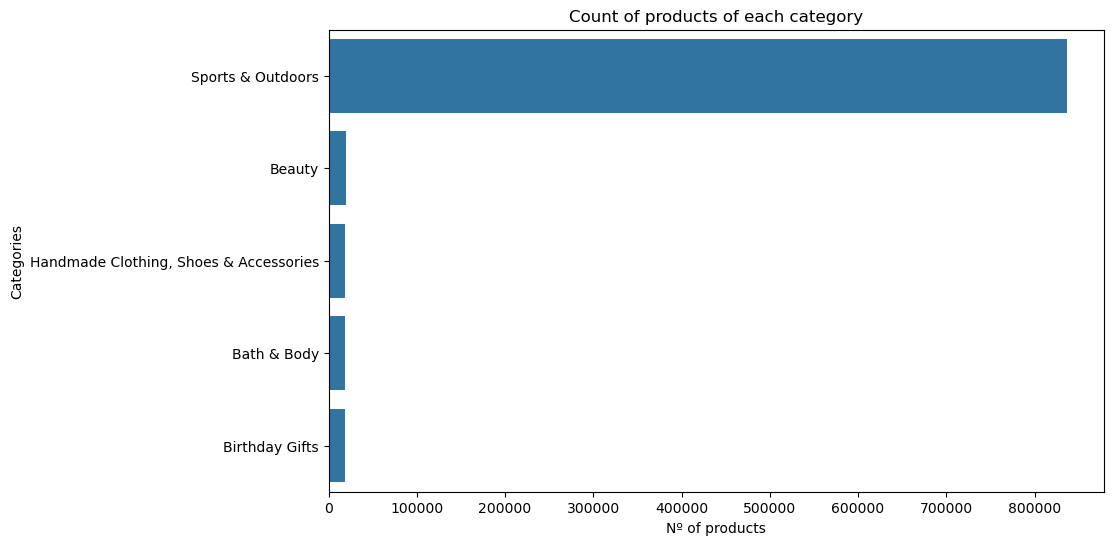

In [290]:
# 2. Visualising the data using bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='absolute_frequency', y='category', data=category_freq_df.head())

# Labels and title
plt.xlabel('Nº of products')
plt.ylabel('Categories')
plt.title('Count of products of each category')
plt.show()

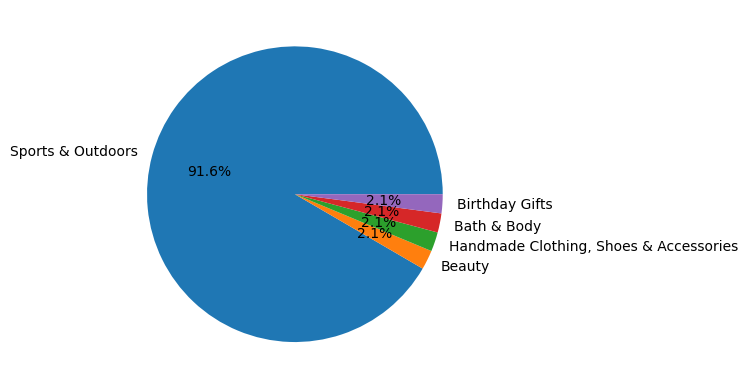

In [294]:
plt.pie(category_freq_df['absolute_frequency'].head(), labels=category_freq_df['category'].head(), autopct='%1.1f%%')
plt.show()

# Part 2: Delving intro Product Pricing

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64


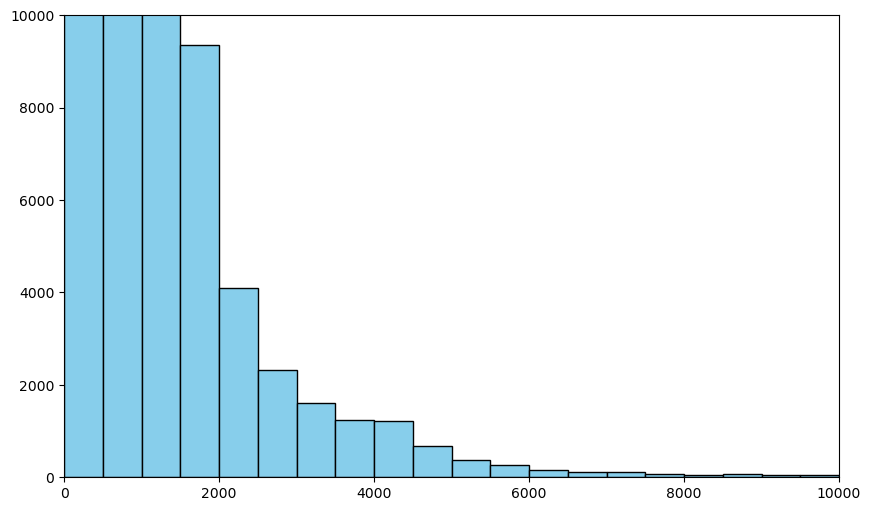

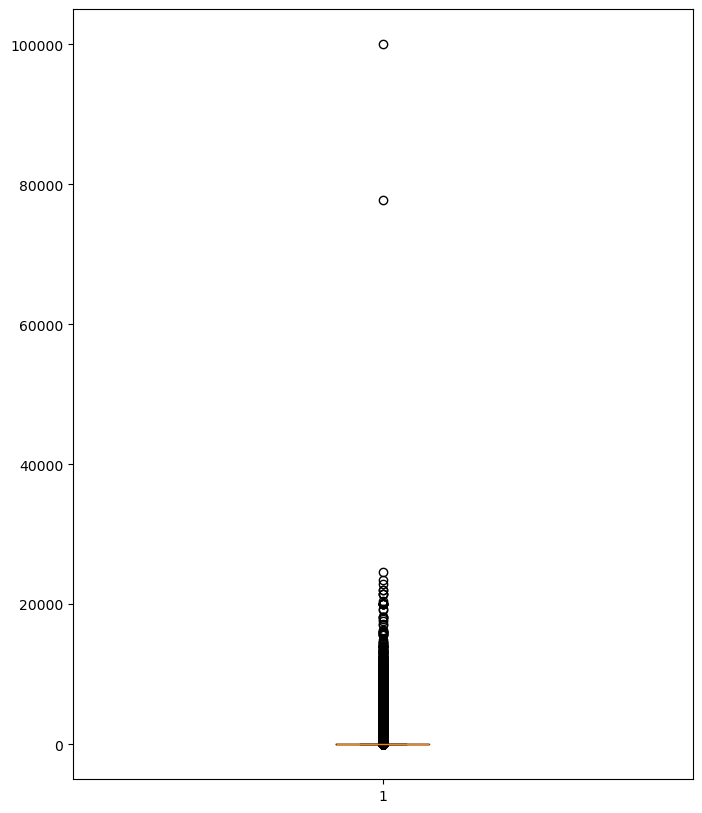

In [256]:
# 1. Measures of Centrality and dispersion
print(amz_dataset['price'].describe())

"""The mean price point is so much higher than mode, x10 times bigger, this probably means that some items sold have a huge price
   The prices of the products are between 10-50 but there are some outliers that indicates that are free products and other products
   that cost 100K so this is the cause that our mean is so high compared to the mode"""

# 2. Visualising the data
plt.figure(figsize=(10,6))
plt.hist(amz_dataset['price'], bins=200, color='skyblue', edgecolor='black')
plt.xlim(0,10000) # Set max price of product
plt.ylim(0,10000) # Number of products to show
"""The hist shows bad because there is a huge difference between min and max values, also there a lot of products with different prices 
   so the histogram group them, we can use a less range of price and use more bins to represent the data"""

plt.figure(figsize=(8,10))
plt.boxplot(amz_dataset['price'])
plt.show()

# Part 3: Unpacking Product Ratings

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64


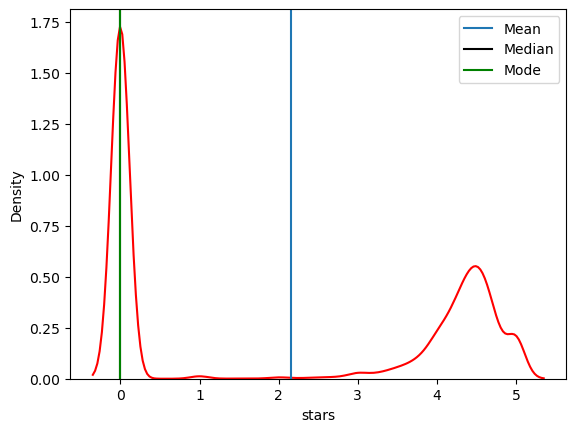

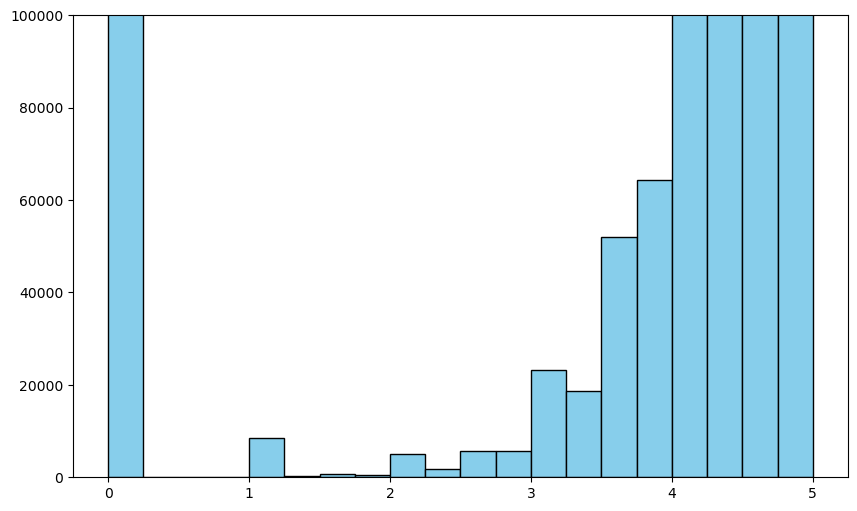

'As a result of this plot we can observe that the most common values of rating are 0 (people that not rate) and rates beetween 4-5 stars'

In [302]:
# 1. Measures of Centrality and dispersion
print(amz_dataset['stars'].describe())

"""We can see that the first 50% of products are rating near 0, the other 50% is divided between 4.5 - 5 stars"""

# 2. Skewness and kurtosis
sns.kdeplot(amz_dataset['stars'], color="red") # Skewness

# Add vertical lines at the position of mean, median, mode
plt.axvline(amz_dataset['stars'].mean(), label="Mean")
plt.axvline(amz_dataset['stars'].median(), color="black", label="Median")
plt.axvline(amz_dataset['stars'].mode().squeeze(), color="green", label="Mode")
plt.legend()
"""The values are not normal distributed, there is a positive skewness and high kurtosis"""

# 3. Visualising the data
plt.figure(figsize=(10,6))
plt.hist(amz_dataset['stars'], bins=20, color='skyblue', edgecolor='black')
plt.ylim(0,100000) # Number of products to show
plt.show()
"""As a result of this plot we can observe that the most common values of rating are 0 (people that not rate) and rates beetween 4-5 stars"""